In [1]:
#Import Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2
from PIL import Image
from IPython.display import Image
%matplotlib inline

[[225 225 225 ... 225 225 225]
 [225 225 225 ... 225 225 225]
 [225 225 225 ... 225 225 225]
 ...
 [213 213 213 ... 207 207 207]
 [213 213 213 ... 207 207 207]
 [213 212 212 ... 207 207 207]]


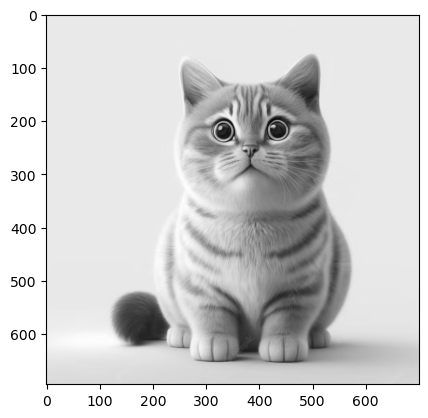

In [2]:
#Import Image as Gray Scale
catImage = cv2.imread("cuteCat.png", 0)

#Using Colormap to Get Proper Rendering / Grayscale Image
plt.imshow(catImage, cmap = 'gray')
print(catImage)

Accessing Individul Pixels

For accessing Any Image in a Numpy Matrix, You have to use Matrix Notation such as Matrix[r,c]. Where The r is the row Number and c is the column number. Also note that the Matrix is 0 Indexed.

For example, If you want to access the first pixel, you need to specify Matrix[0,0]

In [3]:
#Print the First Pixel
print(catImage[0,0])
print(catImage[580,190])

225
43


Modifying Image Pixels

[[ 43  43 225 ... 225 225 225]
 [ 43  43 225 ... 225 225 225]
 [225 225 225 ... 225 225 225]
 ...
 [213 213 213 ... 207 207 207]
 [213 213 213 ... 207 207 207]
 [213 212 212 ... 207 207 207]]


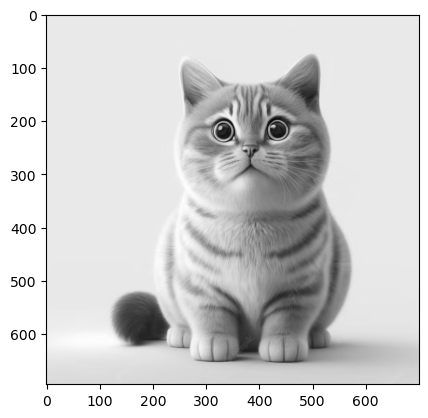

In [4]:
#Copy of The Original Image
catImageCopy = catImage.copy()

#Modifying Pixels
catImageCopy[0,0] = 43
catImageCopy[0,1] = 43
catImageCopy[1,0] = 43
catImageCopy[1,1] = 43

plt.imshow(catImageCopy, cmap = 'gray')
print(catImageCopy)


Cropping Image

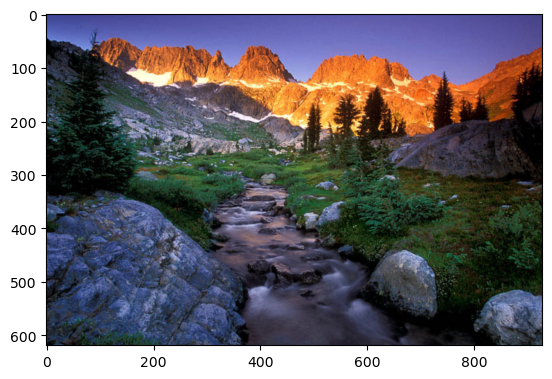

In [5]:
Landscape_BGR = cv2.imread("LandscapeImg.png", cv2.IMREAD_COLOR)
#Convert BGR to RGB Channel
Landscape_RGB = cv2.cvtColor(Landscape_BGR, cv2.COLOR_BGR2RGB) #or Using -> img_Color[:, :, ::-1]

plt.imshow(Landscape_RGB)

Crop out The Middle Region of The Image

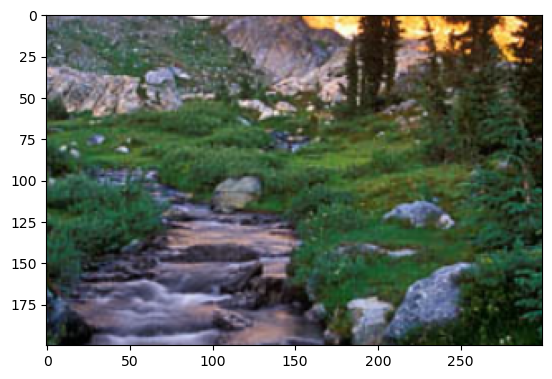

In [6]:
#Using Matrix[row, column] --> Matrix[rowStart:rowEnd, columnStart,columnEnd]
cropped_region = Landscape_RGB[200:400, 300:600]
plt.imshow(cropped_region)

Resizing Image

The resize() function resizes the Image Down to or Up to Specified Image. The Size and Type are derived from the src, dsize, fx and fy.

The Function has 2 arguements - 
    1. src: Input Image 2. dsize: Output Image

Optional arguements are often used include - 1. fx: Scale factor along the Horizontal axis 2. fy: Scale factor along the Vertical axis

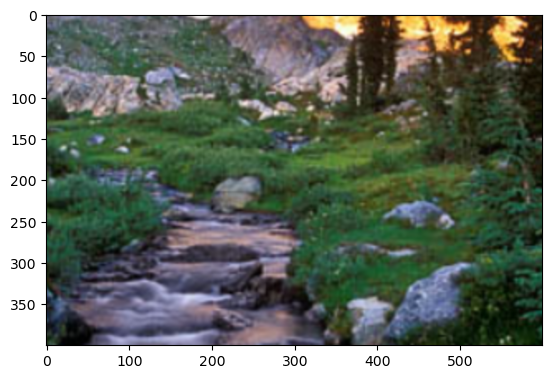

In [7]:
#Method 1: Specifying Scaling Factor fx and fy
resized_cropped_region = cv2.resize(cropped_region, None, fx = 2, fy = 2)
plt.imshow(resized_cropped_region)

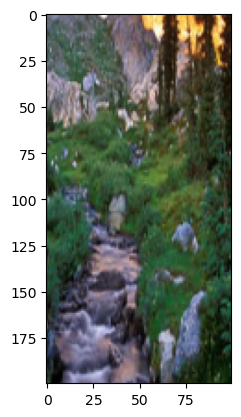

In [8]:
#Method 2: Specifying Exact Size of the Output Image
desired_width = 100
desired_height = 200
dim = (desired_width, desired_height)

resized_cropped_region = cv2.resize(cropped_region, dsize = dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

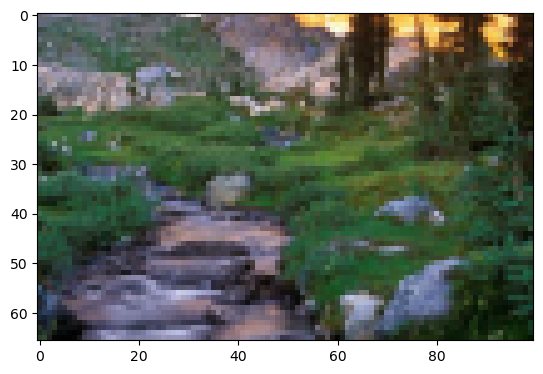

In [9]:
#Resize While Maintaining Aspect Ratio
desired_width = 100
aspect_ratio = desired_width / cropped_region.shape[1]
desired_height = int(cropped_region.shape[0] * aspect_ratio)
dim = (desired_width, desired_height)

resized_cropped_region = cv2.resize(cropped_region, dsize = dim, interpolation = cv2.INTER_AREA)
plt.imshow(resized_cropped_region)

Let's Actually Show the (Cropped) resized Image

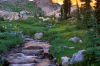

In [10]:
#Swap Channel Order
resized_cropped_region_2x = resized_cropped_region[:, :, ::-1]

#Save Resized Image to Disk
cv2.imwrite("resized_cropped_region_2x.png", resized_cropped_region_2x)

#Display The Cropped Resized Image
Image(filename = "resized_cropped_region_2x.png")


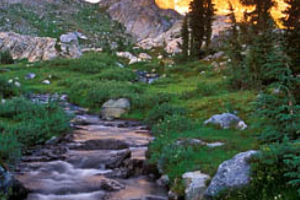

In [11]:
#Swap Channel Order
cropped_region = cropped_region[:, :, ::-1]

#Save Cropped Region
cv2.imwrite("cropped_region.png", cropped_region)

#Display The Cropped Resized Image
Image(filename = "cropped_region.png")

Flipping Image

The Function flip() flips the array in one of three different ways (row and column indices are 0 based)

The Function takes 2 arguements - 1. src: Input Image 2. flipcode: A flag to Specify how to flip the array.

0 means flipping around the X-axis and. 1 means flipping around the Y-axis (positive value). -1 means flipping around both-axis (Neagtive value).

Text(0.5, 1.0, 'Original')

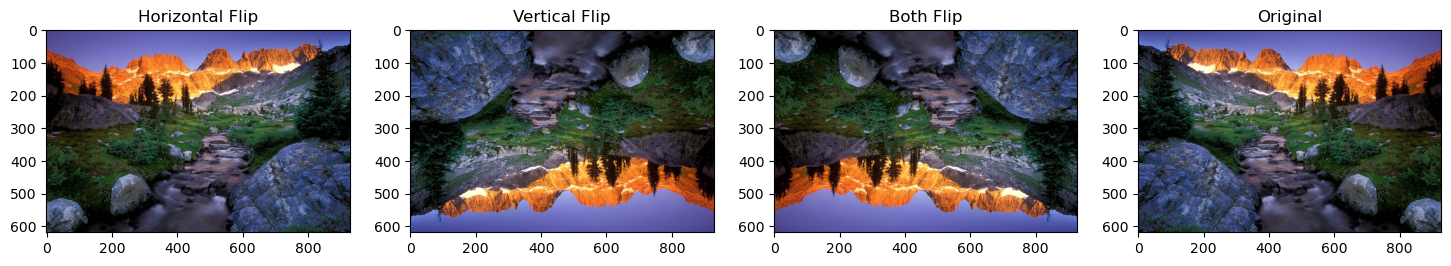

In [12]:
Landscape_RGB_flipped_horz = cv2.flip(Landscape_RGB, 1)
Landscape_RGB_flipped_vert = cv2.flip(Landscape_RGB, 0)
Landscape_RGB_flipped_both = cv2.flip(Landscape_RGB, -1)

#Show Images
plt.figure(figsize = (18, 5))

plt.subplot(141)
plt.imshow(Landscape_RGB_flipped_horz)
plt.title("Horizontal Flip")

plt.subplot(142)
plt.imshow(Landscape_RGB_flipped_vert)
plt.title("Vertical Flip")

plt.subplot(143)
plt.imshow(Landscape_RGB_flipped_both)
plt.title("Both Flip")

plt.subplot(144)
plt.imshow(Landscape_RGB)
plt.title("Original")